<a href="https://colab.research.google.com/github/NijatShahverdiyev/Deep-Learning/blob/main/03_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

In [ ]:
# kaggle.com/c/cifar-10/data

from tensorflow.keras.datasets import cifar10

In [ ]:
# Loading the Dataset

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
class_names = ['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']

In [ ]:
print(class_names)

['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']


In [ ]:
x_train.max()

255

In [ ]:
x_train.min()

0

In [ ]:
x_train.max(), x_train.min(), x_train.mean()

(255, 0, 120.70756512369792)

In [ ]:
y_train.max(), y_train.min()

(9, 0)

In [ ]:
class_names

['0: airplane',
 '1: automobile',
 '2: bird',
 '3: cat',
 '4: deer',
 '5: dog',
 '6: frog',
 '7: horse',
 '8: ship',
 '9: truck']

In [ ]:
 # Normalizing the Images

 x_train = x_train/255.0
 x_test = x_test/255.0

In [ ]:
x_train.max(), x_train.min(), x_train.mean()

(1.0, 0.0, 0.4733630004850874)

In [ ]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

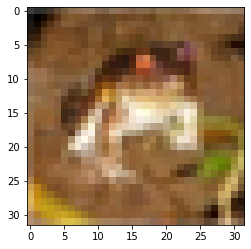

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
class_names

['0: airplane',
 '1: automobile',
 '2: bird',
 '3: cat',
 '4: deer',
 '5: dog',
 '6: frog',
 '7: horse',
 '8: ship',
 '9: truck']

# Building CNN

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
# Adding first CNN layer

# 1) filters (kernel) : 32
# 2) kernel size      : 3
# 3) padding          : same
# 4) activation       : ReLU 
# 5) input shape      : (32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[32, 32, 3]))

In [ ]:
# Adding Second CNN Layer and Maxpool Layer

# 1) filters (kernel) : 32
# 2) kernel size      : 3
# 3) padding          : same
# 4) activation       : ReLU 

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

# Maxpool Layer Parameters

# 1) Pool Size: 2
# 2) Strides  : 2
# 3) Padding  : valid

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [ ]:
# Adding Third CNN Layer

# 1) filters (kernel) : 64
# 2) kernel size      : 3
# 3) padding          : same
# 4) activation       : ReLU 

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

In [ ]:
# Adding Fourth CNN Layer and Maxpool Layer

# 1) filters (kernel) : 64
# 2) kernel size      : 3
# 3) padding          : same
# 4) activation       : ReLU 

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

# Maxpool Layer Parameters

# 1) Pool Size: 2
# 2) Strides  : 2
# 3) Padding  : valid

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [ ]:
# Adding the Dropout Layer

model.add(tf.keras.layers.Dropout(0.4))

In [ ]:
# Adding the Flattening Layer

model.add(tf.keras.layers.Flatten())

In [ ]:
# Adding First Dense Layer

model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
# Adding Second Dense Layer (Output Layer)

model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

# Training the Model

In [ ]:
# Compiling the Model

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['sparse_categorical_accuracy']
)

In [ ]:
# Traing the Model

model.fit(
    x_train, 
    y_train, 
    batch_size=100, 
    epochs=10
)

Epoch 1/10
500/500 [==============================] - 24s 47ms/step - loss: 0.6358 - sparse_categorical_accuracy: 0.7759
Epoch 2/10
500/500 [==============================] - 24s 48ms/step - loss: 0.5802 - sparse_categorical_accuracy: 0.7940
Epoch 3/10
500/500 [==============================] - 24s 49ms/step - loss: 0.5325 - sparse_categorical_accuracy: 0.8116
Epoch 4/10
500/500 [==============================] - 24s 48ms/step - loss: 0.4944 - sparse_categorical_accuracy: 0.8237
Epoch 5/10
500/500 [==============================] - 24s 48ms/step - loss: 0.4564 - sparse_categorical_accuracy: 0.8367
Epoch 6/10
500/500 [==============================] - 24s 49ms/step - loss: 0.4243 - sparse_categorical_accuracy: 0.8483
Epoch 7/10
500/500 [==============================] - 26s 53ms/step - loss: 0.3916 - sparse_categorical_accuracy: 0.8586
Epoch 8/10
500/500 [==============================] - 27s 54ms/step - loss: 0.3638 - sparse_categorical_accuracy: 0.8691
Epoch 9/10
500/500 [============

In [ ]:
# Evaluate the Model Performance

test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.6937 - sparse_categorical_accuracy: 0.7859


In [ ]:
print('Test Accuracy is: {}'.format(test_acc))

Test Accuracy is: 0.7858999967575073


In [ ]:
# Predictions

# y_pred = model.predict_class(x_test)  # deprecated!
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
print(y_pred[10]), print(y_test[10])

0
[0]


(None, None)

In [ ]:
print(y_pred[100]), print(y_test[100])

4
[4]


(None, None)